In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [60]:
data = pd.read_csv("SPAM text message 20170820 - Data.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
data["Length"] = data["Message"].apply(len)

In [62]:
data["Spam"] = data["Category"].apply(lambda x: 1 if x=="spam" else 0)

In [63]:
data.head()

,Category,Message,Length,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [64]:
data.shape

(5572, 4)

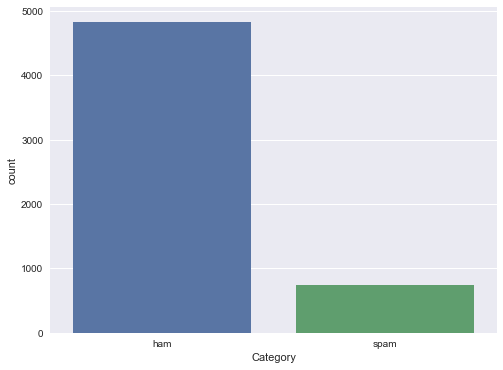

In [65]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x = data.Category)
plt.show()

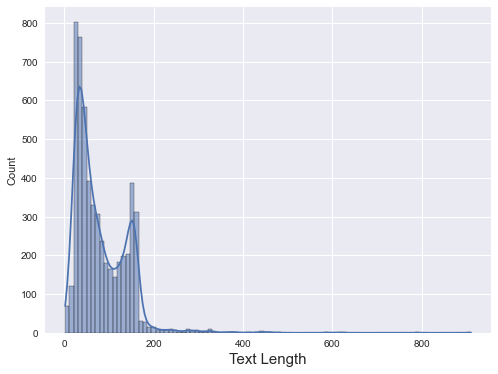

In [66]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x = data["Length"], kde=True);
plt.xlabel("Text Length",fontsize=15);

In [67]:
# Maximum Length of a message
print("Maximum length of a message:", data["Length"].max())

Maximum length of a message: 910


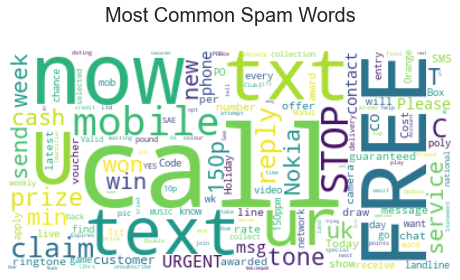

In [68]:
from wordcloud import WordCloud

spam_data = data[data.Category == 'spam']

spam_texts = " ".join(text for text in spam_data['Message'])

spam_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(spam_texts)

plt.imshow(spam_cloud, interpolation='bilinear')
plt.title('Most Common Spam Words', fontsize=20, y=1.1)
plt.axis("off");

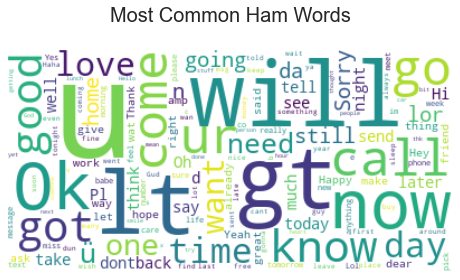

In [69]:
ham_data = data[data.Category == 'ham']

ham_text = " ".join(text for text in ham_data['Message'])

ham_cloud = WordCloud(background_color = 'white', max_words=150, collocations = False).generate(ham_text)

plt.imshow(ham_cloud, interpolation='bilinear')
plt.title('Most Common Ham Words', fontsize=20, y=1.1)
plt.axis("off");

In [70]:
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpous = []

for i in range(0,len(data)):
    review = re.sub('[^a-zA-z]',' ',data['Message'][i])
    review = review.lower()
    review = review.split()
    
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpous.append(review)
    
    

In [71]:
corpous

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [72]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpous).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
data.drop(['Category','Length'],1,inplace  = True)

In [74]:
y = data["Spam"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Spam, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Multinomial naive bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [77]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [80]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,y_pred)
confusion

array([[1432,   16],
       [   9,  215]], dtype=int64)

In [89]:
MultinomialNBScore = nb.score(X_test, y_test)
print("Accuracy obtained by Multinomial Naive Bayes model:",MultinomialNBScore*100)

Accuracy obtained by Multinomial Naive Bayes model: 98.50478468899522


In [81]:
from sklearn import metrics

y_pred_nb = nb.predict(X_test)
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.93      0.96      0.95       224

    accuracy                           0.99      1672
   macro avg       0.96      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



# Bernoulli

In [82]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [83]:
y_pred_bnb = bnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.98      0.87      0.92       224

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [90]:
BernoulliNBScore = bnb.score(X_test, y_test)
print("Accuracy obtained by Bernoulli Naive Bayes model:",BernoulliNBScore*100)

Accuracy obtained by Bernoulli Naive Bayes model: 98.02631578947368


# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred_dtc = dtc.predict(X_test)
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1448
           1       0.93      0.88      0.91       224

    accuracy                           0.98      1672
   macro avg       0.96      0.94      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [91]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 97.54784688995215


# Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [85]:
y_pred_rfc = rfc.predict(X_test)
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.84      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [92]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 97.84688995215312


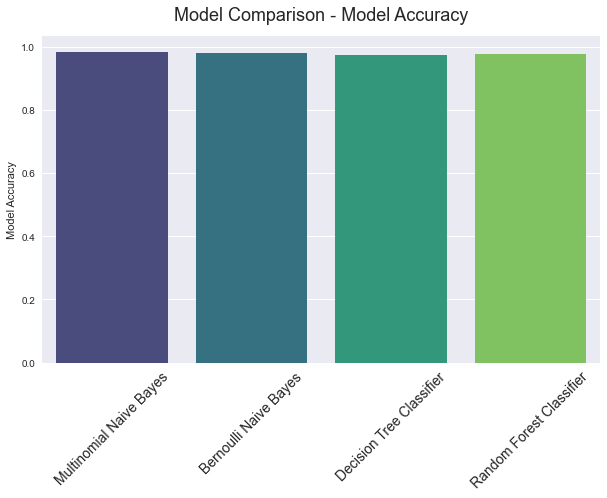

In [94]:
plt.style.use("seaborn")

x = ["Multinomial Naive Bayes",
     "Bernoulli Naive Bayes",
     "Decision Tree Classifier", 
     "Random Forest Classifier"
     ]

y = [MultinomialNBScore,
     BernoulliNBScore,
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore 
    ]

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=x,y=y, palette="viridis");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=45, fontsize=14)
plt.title("Model Comparison - Model Accuracy", fontsize=18, y=1.03)
plt.show()